# Comparing Star Player Team vs No Star Player Attendance


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [116]:
#Importing files
star_attendance = pd.read_csv("Cleaned_Data/star_team_attendance.csv")
no_star_attendance = pd.read_csv("Cleaned_Data/no_star_team_attendance.csv")
star_attendance.set_index("Year")
no_star_attendance.set_index("Year")

,Team,Home AVG,Road AVG
Year,,,
2015,Atlanta Hawks,17412,17582
2015,Boston Celtics,17594,17742
2015,Charlotte Hornets,17192,17654
2015,Chicago Bulls,21866,18405
2015,Dallas Mavericks,20188,17653
...,...,...,...
2019,Brooklyn Nets,14941,18086
2019,New York Knicks,19002,17566
2019,Philadelphia 76ers,20453,17895


In [119]:
stars_by_year = star_attendance.groupby("Year").mean()
no_stars_by_year = no_star_attendance.groupby("Year").mean()
stars_by_year

,Home AVG,Road AVG
Year,,
2015,19037.142857,18005.714286
2016,19048.333333,18288.888889
2017,18227.111111,18026.833333
2018,18155.950000,18051.000000
2019,17873.416667,17887.041667


In [118]:
comparing_attendance = pd.merge(stars_by_year, no_stars_by_year, on = "Year", suffixes= (" Stars", " No Stars"))
comparing_attendance = comparing_attendance.reset_index()
comparing_attendance

,Year,Home AVG Stars,Road AVG Stars,Home AVG No Stars,Road AVG No Stars
0,2015,19037.142857,18005.714286,17457.695652,17771.608696
1,2016,19048.333333,18288.888889,17355.714286,17682.666667
2,2017,18227.111111,18026.833333,17656.608696,17816.391304
3,2018,18155.950000,18051.000000,17661.100000,17870.800000
4,2019,17873.416667,17887.041667,17727.666667,17747.166667


In [112]:
years = [year for year in comparing_attendance["Year"]]
stars = [atten for atten in comparing_attendance["Home AVG Stars"]]
no_stars = [atten for atten in comparing_attendance["Home AVG No Stars"]]
bar_sets = 5

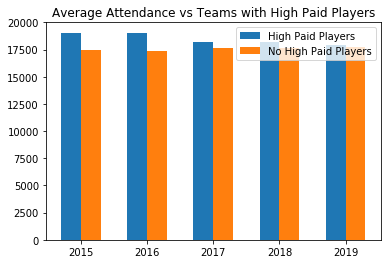

In [114]:
fig, axes = plt.subplots()

year = np.arange(bar_sets)    # the x locations for the groups
width = 0.30         # the width of the bars
p1 = axes.bar(year, stars, width, bottom=0, )

p2 = axes.bar(year + width, no_stars, width, bottom=0)

axes.set_title('Average Attendance vs Teams with High Paid Players')
axes.set_xticks(year + width / 2)
axes.set_xticklabels(years)

axes.legend((p1[0], p2[0]), ('High Paid Players', 'No High Paid Players'))
axes.autoscale_view()

plt.show()